# Model Inference for House Prices Prediction

This notebook loads the best model from MLflow Model Registry, makes predictions on the test dataset, and generates a submission file for the Kaggle House Prices competition.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import dagshub
import mlflow
import os
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

## MLFLOW Setup

Connect to DagsHub MLflow tracking server.

In [4]:
dagshub.init(repo_owner='lagorg22', repo_name='house_prices', mlflow=True)
print('success')

Accessing as lagorg22

Initialized MLflow to track repo "lagorg22/house_prices"

Repository lagorg22/house_prices initialized!

success


In [5]:
print("Loading test data...")
test_data = pd.read_csv('RF_X_test_selected_features.csv')
print(f"Test data shape: {test_data.shape}")
test_data.head()

Loading test data...
Test data shape: (1459, 53)


,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,2,80.0,11622,3,3,0,9,1,0,1,...,1,1961.0,2,1.0,730.0,2,140,0,4,2
1,3,81.0,14267,0,3,0,9,2,0,1,...,1,1958.0,2,1.0,312.0,2,393,36,4,2
2,3,74.0,13830,0,3,0,5,2,0,2,...,1,1997.0,0,2.0,482.0,2,212,34,4,2
3,3,78.0,9978,0,3,0,5,2,0,2,...,1,1998.0,0,2.0,470.0,2,360,36,4,2
4,3,43.0,5005,0,1,0,19,2,4,1,...,1,1992.0,1,2.0,506.0,2,0,82,4,2


## Load the best model from MLflow Model Registry

In [9]:
print("\nLoading best model from MLflow Model Registry...")

model_name = "house_prices_xgboost"

# Load the model
model_uri = f"models:/{model_name}/latest"
best_model = mlflow.pyfunc.load_model(model_uri)

print(f"Loaded model: {model_name}")


Loading best model from MLflow Model Registry...


Loaded model: house_prices_xgboost


## Prepare features for prediction

In [13]:

test_original = pd.read_csv('test.csv')
# Get the ID column for the submission file
test_ids = test_original['Id']

## Make predictions

In [14]:
print("\nMaking predictions...")

predictions = best_model.predict(test_data)


Making predictions...


## Create submission file

In [15]:
print("\nCreating submission file...")

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': predictions
})

# Save the submission file
submission_file_path = 'submission.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")

# Review the submission
submission.head()


Creating submission file...
Submission file created at: submission.csv


,Id,SalePrice
0,1461,116265.101562
1,1462,157079.609375
2,1463,187891.281250
3,1464,192283.062500
4,1465,182446.343750


In [16]:
# Summary statistics of predictions
print("\nPrediction summary statistics:")
print(submission['SalePrice'].describe())


Prediction summary statistics:
count      1459.000000
mean     175010.328125
std       71235.679688
min       46847.429688
25%      128422.113281
50%      156416.375000
75%      203701.062500
max      569553.625000
Name: SalePrice, dtype: float64


## Visualize predictions

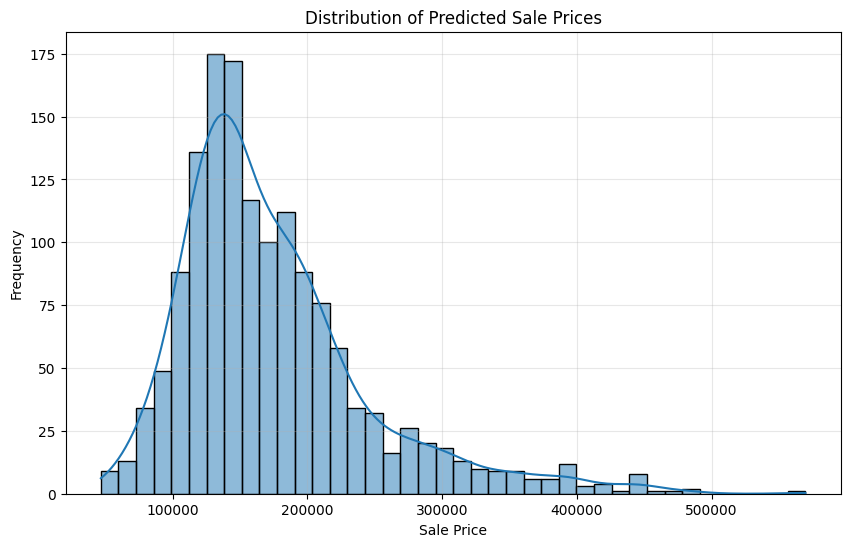

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(submission['SalePrice'], kde=True)
plt.title('Distribution of Predicted Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()